In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [45]:
#Load the datasets (If doing Train Test Split in this script)

df = pd.read_csv('TrainingSets/TrainingData.csv')

In [36]:
df

,Date,Close,Open,High,Low,Vol.,Change %,return_1d,return_21d,return_63d,macd,macd_signal,macd_hist,volatility,Target
0,02/14/1995,-0.503264,-0.495490,-0.507674,-0.483120,-0.449743,-0.073927,-0.076736,-0.064437,-0.113838,0.007077,0.001755,0.017732,-0.730385,0
1,02/15/1995,-0.529106,-0.500564,-0.522569,-0.506429,-0.324925,-0.615747,-0.627913,-0.064437,-0.113838,-0.032836,-0.005585,-0.090127,-0.657557,1
2,02/16/1995,-0.526522,-0.522128,-0.538705,-0.514199,-0.406680,0.045984,0.046483,-0.064437,-0.113838,-0.060570,-0.017360,-0.144584,-0.808153,0
3,02/17/1995,-0.526522,-0.519591,-0.537464,-0.506429,-0.447994,-0.016192,-0.015586,-0.064437,-0.113838,-0.081905,-0.031322,-0.171426,-0.853840,0
4,02/21/1995,-0.558824,-0.524665,-0.547393,-0.532329,-0.374328,-0.771186,-0.790386,-0.064437,-0.113838,-0.141218,-0.055116,-0.292156,-0.756758,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,02/12/2014,0.606036,0.608099,0.604467,0.637717,0.284517,-0.260455,-0.266400,0.195159,-0.746172,-0.241849,-0.705371,1.375110,-0.522140,1
4980,02/13/2014,0.650587,0.593536,0.597665,0.635127,0.284517,0.636656,0.653340,0.234105,-0.650730,-0.113907,-0.588542,1.434463,-0.499596,1
4981,02/14/2014,0.666093,0.636665,0.628696,0.682368,0.284517,0.205865,0.213843,0.542856,-0.607582,0.008087,-0.469112,1.466400,-0.507162,1
4982,02/18/2014,0.741707,0.658838,0.679586,0.705056,0.284517,1.071888,1.097647,0.735365,-0.437462,0.204482,-0.331765,1.686395,-0.432448,1


In [46]:
#Use only if need Date in training data. Since we are doing classification we can drop the date
Date = False
if Date == True:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df['Year'] = df['Date'].dt.day
        df['Weekday'] = df['Date'].dt.weekday
        df.drop('Date', axis=1, inplace=True)
else:
    df.drop('Date', axis=1, inplace=True)  # Optional: remove if not needed for modeling

In [38]:
#Check columns of df
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'return_1d',
       'return_21d', 'return_63d', 'macd', 'macd_signal', 'macd_hist',
       'volatility', 'Target'],
      dtype='object')

## Begin Training

In [47]:
#Delcare Target
#WARNING : there should be no selection nor shuffling later on ! (otherwise misalignement)
target = df["Target"]

In [48]:
#Drop Unnecessary columns
# For simplicity only keep some most important features. Can add more later down below
data=pd.DataFrame(df, columns=['Close', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'return_1d','macd', 'macd_signal', 'macd_hist',
       'volatility'])

print ("Df shape of dataset to be used :",data.shape)
display(data.head())
display(target.head())


Df shape of dataset to be used : (4984, 11)


,Close,Open,High,Low,Vol.,Change %,return_1d,macd,macd_signal,macd_hist,volatility
0,-0.503264,-0.495490,-0.507674,-0.483120,-0.449743,-0.073927,-0.076736,0.007077,0.001755,0.017732,-0.730385
1,-0.529106,-0.500564,-0.522569,-0.506429,-0.324925,-0.615747,-0.627913,-0.032836,-0.005585,-0.090127,-0.657557
2,-0.526522,-0.522128,-0.538705,-0.514199,-0.406680,0.045984,0.046483,-0.060570,-0.017360,-0.144584,-0.808153
3,-0.526522,-0.519591,-0.537464,-0.506429,-0.447994,-0.016192,-0.015586,-0.081905,-0.031322,-0.171426,-0.853840
4,-0.558824,-0.524665,-0.547393,-0.532329,-0.374328,-0.771186,-0.790386,-0.141218,-0.055116,-0.292156,-0.756758


0    0
1    1
2    0
3    0
4    1
Name: Target, dtype: int64

## PreProcess the Data

In [6]:
# Load the training sets (If necessary)
X_train = pd.read_csv('TrainingSets/X_train_scaled.csv')#, index_col=0)
y_train = pd.read_csv('TrainingSets/y_train.csv')#, index_col=0)
X_test = pd.read_csv('TrainingSets/X_test_scaled.csv')#, index_col=0)
y_test = pd.read_csv('TrainingSets/y_test.csv')#, index_col=0)
#X_val = pd.read_csv('X_val_scaled.csv', index_col=0)
#y_val = pd.read_csv('y_val.csv', index_col=0)

In [27]:
test_size = 0.2
random_state=42

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size, random_state=random_state)

In [49]:
#Optional....split into a train, test and validation set

X_temp, X_test, y_temp, y_test = train_test_split(data, target, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [29]:
#Reset index for dataseries, not needed for ndarray (X_train, X_test)
#Basically just re-adding the original element indexing from pandas
y_train, y_test = \
    y_train.reset_index(drop=True),y_test.reset_index(drop=True)

print ("X_train shape:",X_train.shape)
print ("y_train shape:",y_train.shape)


print ("X_test shape:",X_test.shape)
print ("y_test shape:",y_test.shape)

X_train shape: (3987, 11)
y_train shape: (3987,)
X_test shape: (997, 11)
y_test shape: (997,)


## Build the Training Model

Epoch 1/50
94/94 [==============================] - 1s 5ms/step - loss: -0.1054 - mean_squared_error: 2.1463 - val_loss: -1.0488 - val_mean_squared_error: 1.4712
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: -1.6502 - mean_squared_error: 2.4472 - val_loss: -2.4981 - val_mean_squared_error: 3.5019
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: -2.2651 - mean_squared_error: 4.5746 - val_loss: -2.9240 - val_mean_squared_error: 5.2353
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: -2.6613 - mean_squared_error: 5.8918 - val_loss: -3.1467 - val_mean_squared_error: 6.4941
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: -2.7284 - mean_squared_error: 7.4179 - val_loss: -3.3051 - val_mean_squared_error: 7.6234
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: -2.9512 - mean_squared_error: 8.4239 - val_loss: -3.4506 - val_mean_squared_error: 8.6511
Epoch 7/50
94/94 [==========

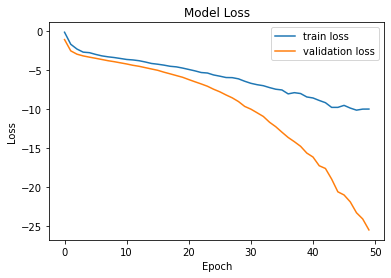

In [50]:
#Construct model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import HeNormal
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

# Assuming the target columns in y_train, y_val, y_test are single columns
#y_train = y_train.values.ravel()
#y_val = y_val.values.ravel()
#y_test = y_test.values.ravel()


#Add custom loss function
def sharpe_loss(y_true, y_pred):
    # Assuming y_pred are returns predictions and y_true are actual returns
    # Calculate expected return and volatility (standard deviation)
    returns = tf.reduce_mean(y_pred)  # Expected return
    volatility = tf.math.reduce_std(y_pred)  # Standard deviation of returns
    sharpe_ratio = returns / (volatility + 1e-6)  # Added a small constant to avoid division by zero
    return -sharpe_ratio  # Minimize the negative Sharpe ratio (i.e., maximize the Sharpe ratio)



#Construct model

input_shape=11

def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=HeNormal(), input_shape=(input_shape,)),
        Dropout(0.1),
        Dense(64, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.1),
        Dense(1, activation='linear')  # Assuming a binary classification problem
    ])
    model.compile(optimizer=Adam(learning_rate=.0001), loss=sharpe_loss, metrics=['mean_squared_error'])
    return model

model = build_model(input_shape)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val))

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
